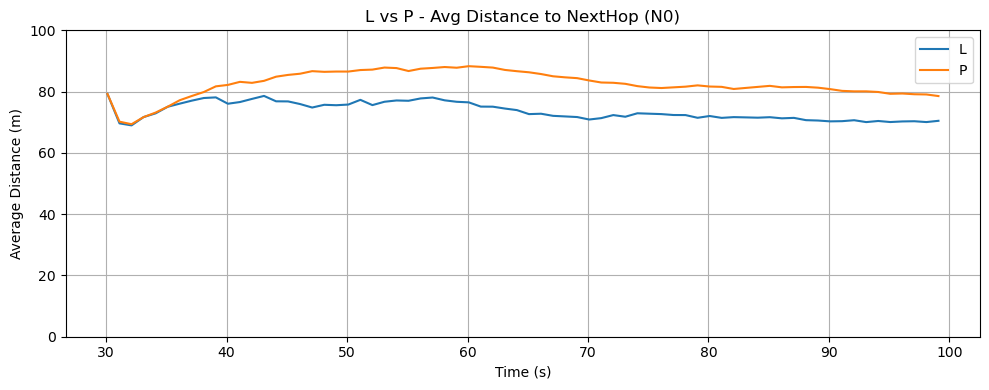

[L] 위치 파일 없음: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Log/2025_07_14_AppSci_AODV_V10\L\D400\S30\N2\position.csv
[P] 위치 파일 없음: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Log/2025_07_14_AppSci_AODV_V10\P\D400\S30\N2\position.csv
[N2] 유효한 데이터 없음
[L] 위치 파일 없음: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Log/2025_07_14_AppSci_AODV_V10\L\D400\S30\N9\position.csv
[P] 위치 파일 없음: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Log/2025_07_14_AppSci_AODV_V10\P\D400\S30\N9\position.csv
[N9] 유효한 데이터 없음
[L] 위치 파일 없음: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Log/2025_07_14_AppSci_AODV_V10\L\D400\S30\N10\position.csv
[P] 위치 파일 없음: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Log/2025_07_14_AppSci_AODV_V10\P\D400\S30\N10\position.csv
[N10] 유효한 데이터 없음


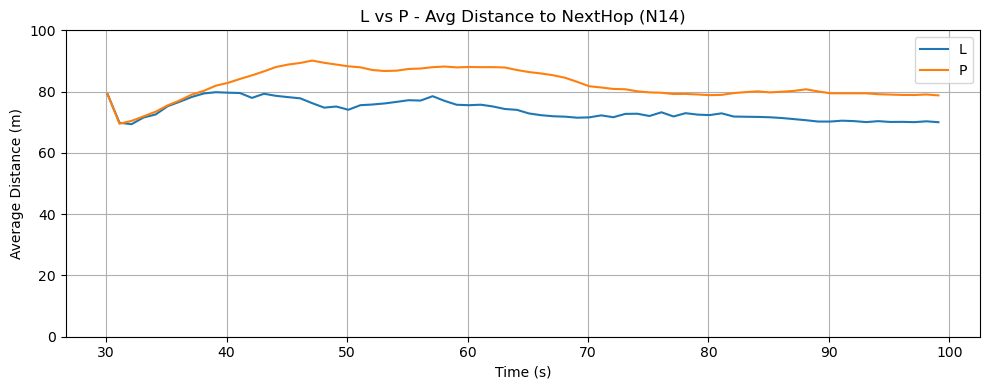

[L] 위치 파일 없음: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Log/2025_07_14_AppSci_AODV_V10\L\D400\S30\N16\position.csv
[P] 위치 파일 없음: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Log/2025_07_14_AppSci_AODV_V10\P\D400\S30\N16\position.csv
[N16] 유효한 데이터 없음
[L] 위치 파일 없음: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Log/2025_07_14_AppSci_AODV_V10\L\D400\S30\N18\position.csv
[P] 위치 파일 없음: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Log/2025_07_14_AppSci_AODV_V10\P\D400\S30\N18\position.csv
[N18] 유효한 데이터 없음
[L] 위치 파일 없음: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Log/2025_07_14_AppSci_AODV_V10\L\D400\S30\N24\position.csv
[P] 위치 파일 없음: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Log/2025_07_14_AppSci_AODV_V10\P\D400\S30\N24\position.csv
[N24] 유효한 데이터 없음
[L] 위치 파일 없음: C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Log/2025_07_14_AppSci_AODV_V10\L\D400\S30\N29\position.csv


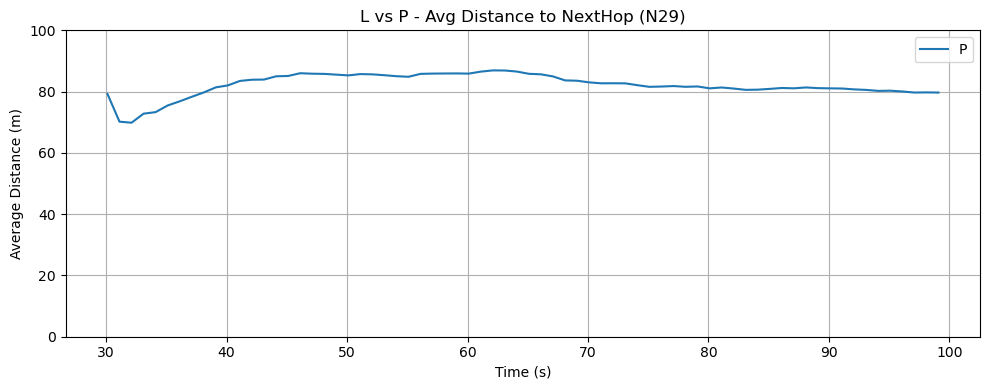

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Log/2025_07_14_AppSci_AODV_V10"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N9", "N10", "N14", "N16", "N18", "N24", "N29"]
#nodes = ["N2", "N3", "N5", "N10", "N13", "N14", "N18", "N24", "N29"]
methods = ["L", "P"]
max_tx_dist = 100.0

for node in nodes:
    results = {}

    for method in methods:
        pos_path = os.path.join(base_path, method, density, speed, node, "position.csv")
        if not os.path.exists(pos_path):
            print(f"[{method}] 위치 파일 없음: {pos_path}")
            continue

        df_all = pd.read_csv(pos_path)
        times = sorted(df_all["Time"].unique())
        avg_distances, invalid_ratios, valid_counts, times_for_plot = [], [], [], []

        for t in times:
            df_t = df_all[df_all["Time"] == t]
            if df_t.empty:
                avg_distances.append(0)
                invalid_ratios.append(0)
                valid_counts.append(0)
                times_for_plot.append(t)
                continue

            dists = []
            invalid, total = 0, 0

            for _, row in df_t.iterrows():
                dist = sqrt((row["NodeX"] - row["NextHopX"])**2 + (row["NodeY"] - row["NextHopY"])**2)
                dists.append(dist)
                total += 1
                if dist > max_tx_dist:
                    invalid += 1

            avg = sum(dists) / len(dists) if dists else 0
            ratio = (invalid / total) * 100.0 if total > 0 else 0.0

            avg_distances.append(avg)
            invalid_ratios.append(ratio)
            valid_counts.append(total - invalid)
            times_for_plot.append(t)

        results[method] = {
            "times": times_for_plot,
            "avg_distances": avg_distances,
            "invalid_ratios": invalid_ratios,
            "valid_counts": valid_counts
        }

    all_avg_dists = [v for m in results.values() for v in m["avg_distances"]]
    all_invalids = [v for m in results.values() for v in m["invalid_ratios"]]
    all_valid_counts = [v for m in results.values() for v in m["valid_counts"]]

    if not all_avg_dists:
        print(f"[{node}] 유효한 데이터 없음")
        continue

    avg_ymin, avg_ymax = min(all_avg_dists), max(all_avg_dists)
    inv_ymin, inv_ymax = 0, max(all_invalids)
    val_ymin, val_ymax = 0, max(all_valid_counts)

    plt.figure(figsize=(10, 4))
    for method in methods:
        if method in results:
            plt.plot(results[method]["times"], results[method]["avg_distances"], label=method)
    plt.xlabel("Time (s)")
    plt.ylabel("Average Distance (m)")
    plt.title(f"L vs P - Avg Distance to NextHop ({node})")
    #plt.ylim(avg_ymin, avg_ymax * 1.05)
    plt.ylim(0, 100) 
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 4))
    for method in methods:
        if method in results:
            plt.plot(results[method]["times"], results[method]["invalid_ratios"], label=method)
    plt.xlabel("Time (s)")
    plt.ylabel("Invalid Ratio (%)")
    plt.title(f"L vs P - Invalid NextHop Ratio ({node})")
    plt.ylim(inv_ymin, inv_ymax * 1.05)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 4))
    for method in methods:
        if method in results:
            plt.plot(results[method]["times"], results[method]["valid_counts"], label=method)
    plt.xlabel("Time (s)")
    plt.ylabel("Valid Links (Count)")
    plt.title(f"L vs P - Valid NextHop Count ({node})")
    plt.ylim(val_ymin, val_ymax * 1.05)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

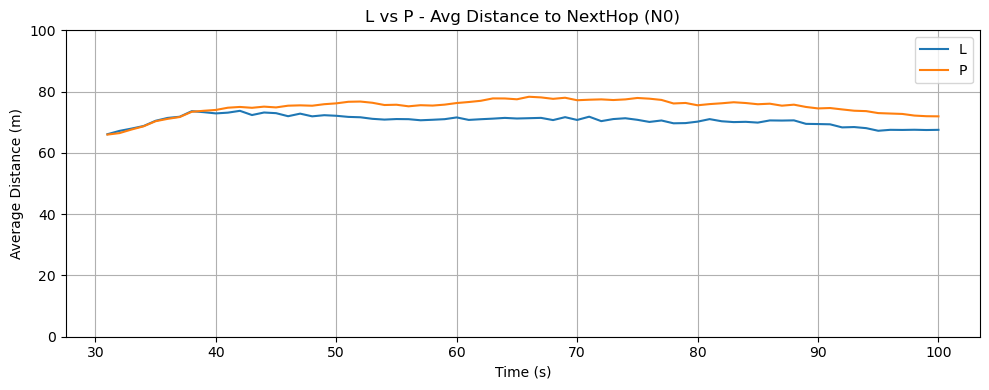

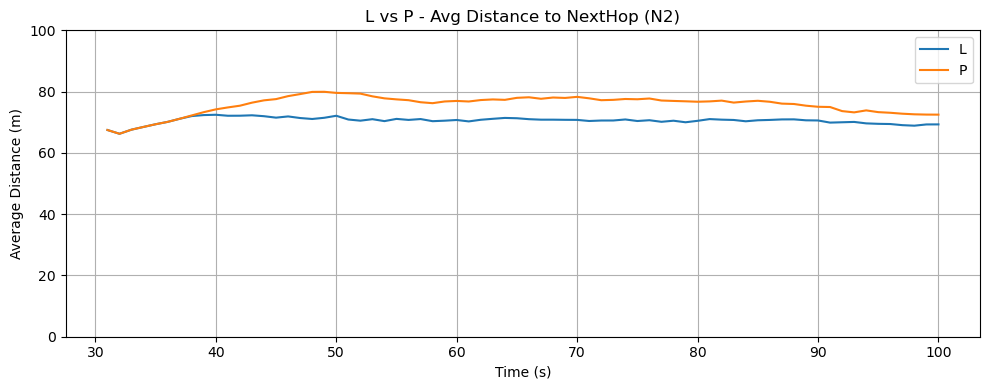

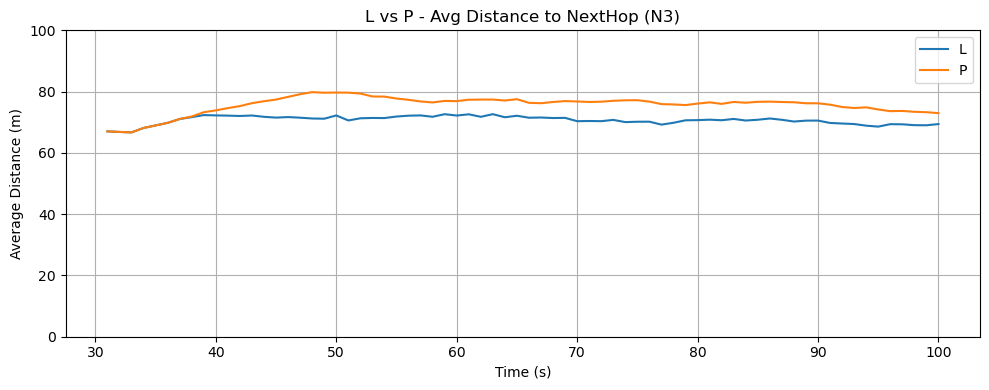

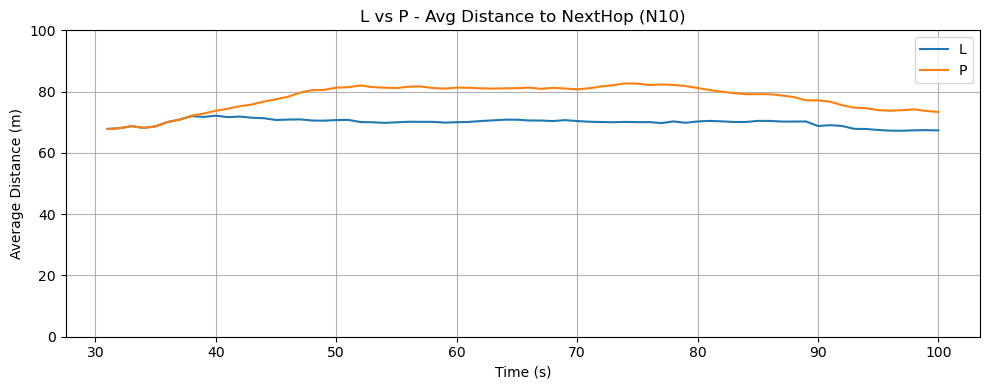

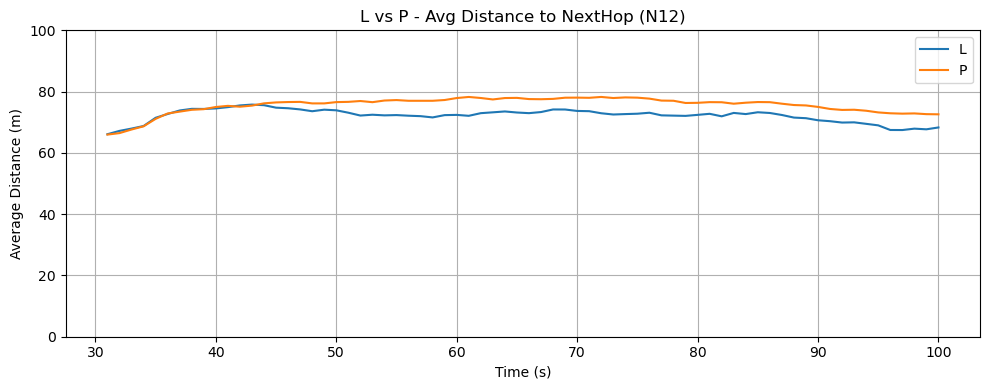

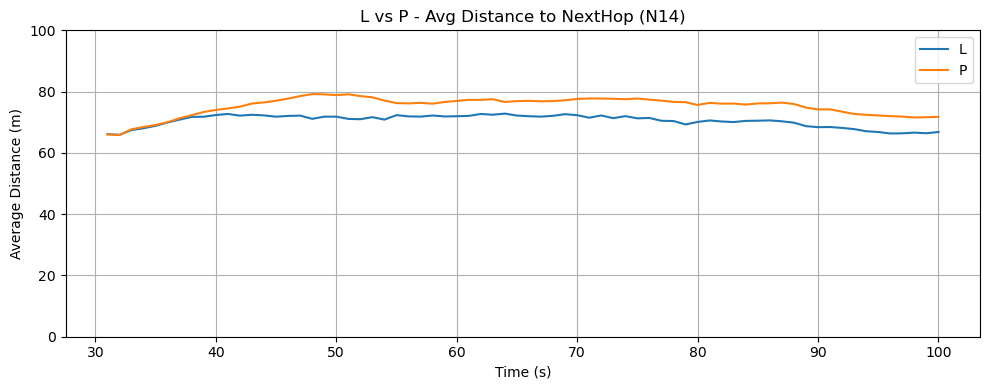

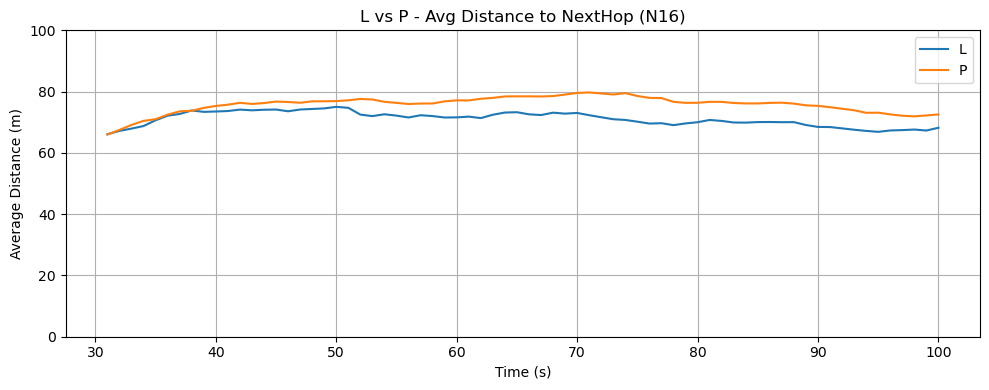

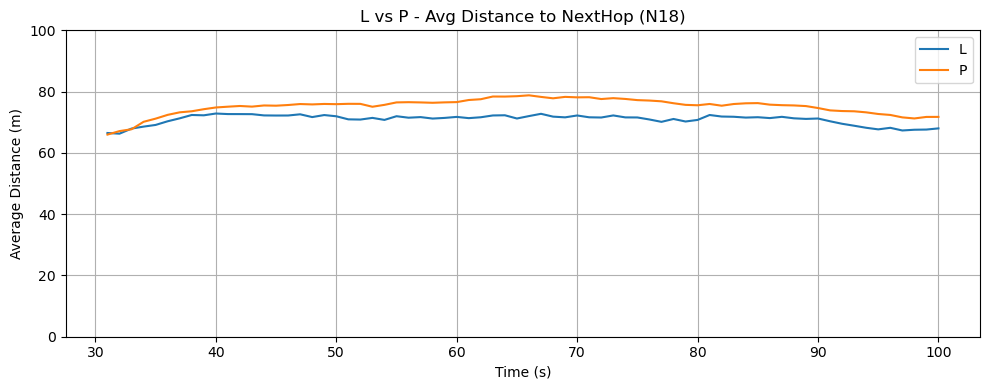

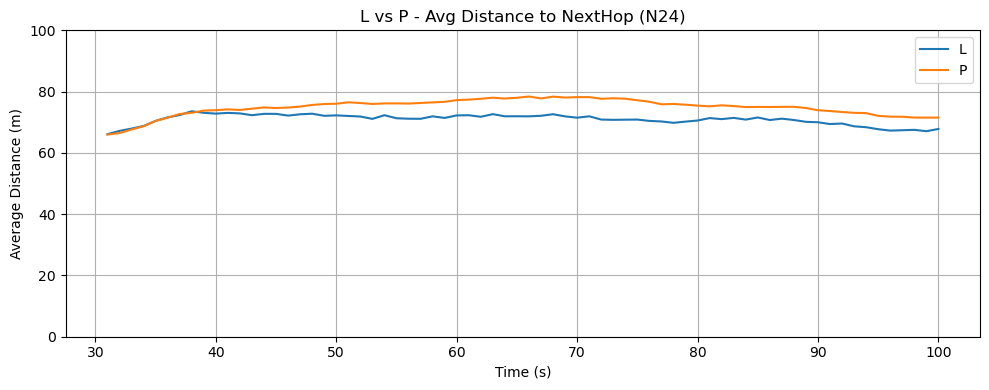

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Log/2025_07_14_AppSci_AODV_V10"
density = "D200"
speed = "S20"
nodes = ["N0", "N2", "N3", "N10", "N12", "N14", "N16", "N18", "N24"]
methods = ["L", "P"]
max_tx_dist = 100.0  # 사용하지 않지만 혹시 몰라 유지

for node in nodes:
    results = {}

    for method in methods:
        pos_path = os.path.join(base_path, method, density, speed, node, "position.csv")
        if not os.path.exists(pos_path):
            print(f"[{method}] 위치 파일 없음: {pos_path}")
            continue

        df_all = pd.read_csv(pos_path)
        times = sorted(df_all["Time"].unique())
        avg_distances, times_for_plot = [], []

        for t in times:
            df_t = df_all[df_all["Time"] == t]
            if df_t.empty:
                avg_distances.append(0)
                times_for_plot.append(t)
                continue

            dists = [
                sqrt((row["NodeX"] - row["NextHopX"])**2 + (row["NodeY"] - row["NextHopY"])**2)
                for _, row in df_t.iterrows()
            ]
            avg = sum(dists) / len(dists) if dists else 0
            avg_distances.append(avg)
            times_for_plot.append(t)

        results[method] = {
            "times": times_for_plot,
            "avg_distances": avg_distances
        }

    all_avg_dists = [v for m in results.values() for v in m["avg_distances"]]
    if not all_avg_dists:
        print(f"[{node}] 유효한 데이터 없음")
        continue

    plt.figure(figsize=(10, 4))
    for method in methods:
        if method in results:
            plt.plot(results[method]["times"], results[method]["avg_distances"], label=method)
    plt.xlabel("Time (s)")
    plt.ylabel("Average Distance (m)")
    plt.title(f"L vs P - Avg Distance to NextHop ({node})")
    plt.ylim(0, 100)  # 필요 시 수정 가능
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


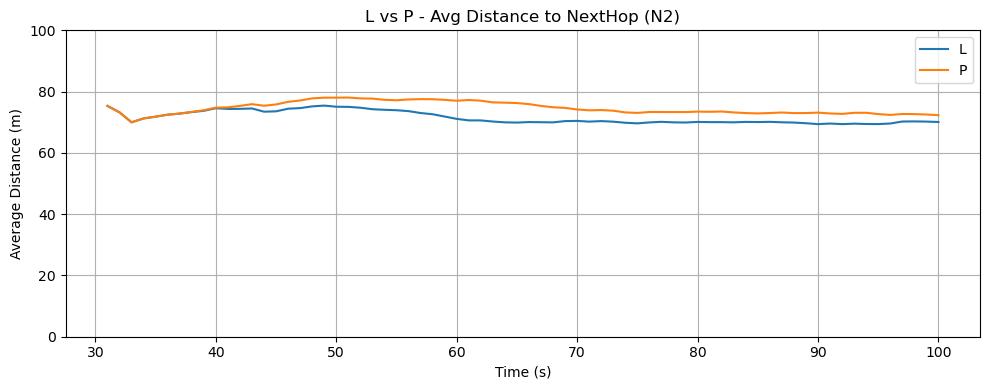

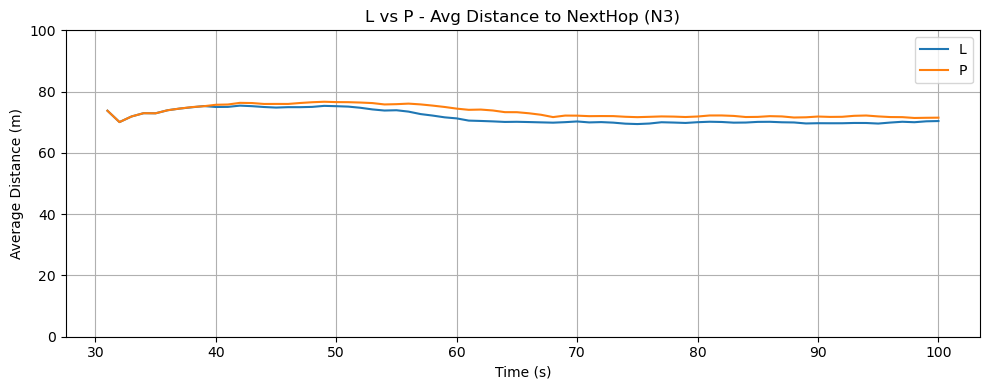

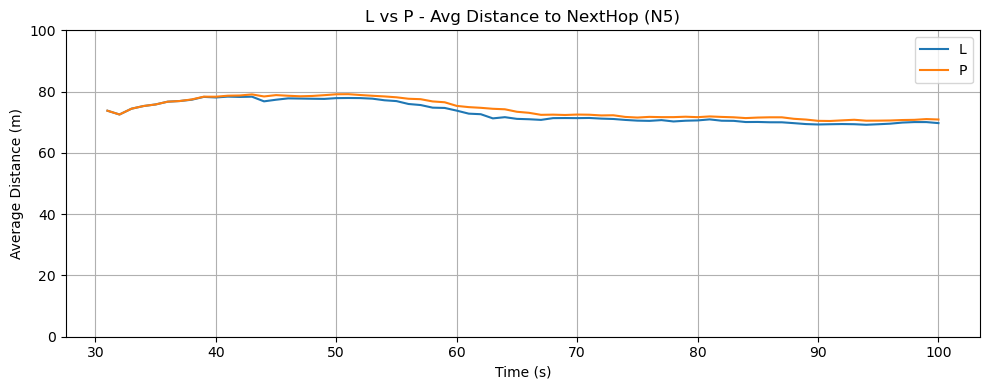

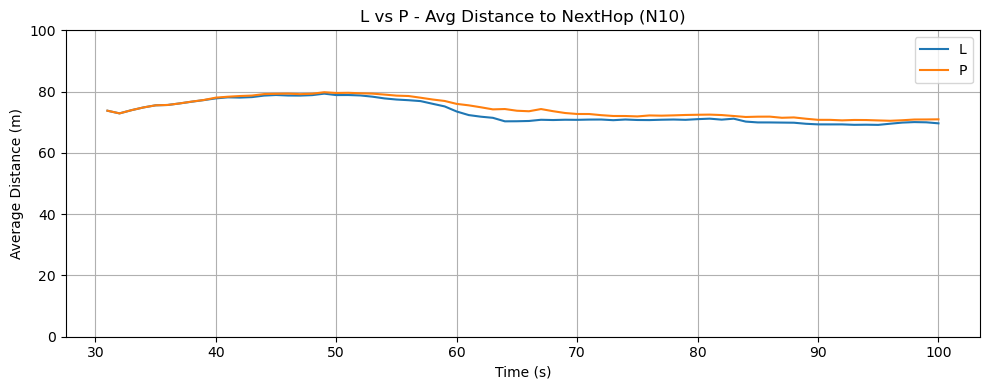

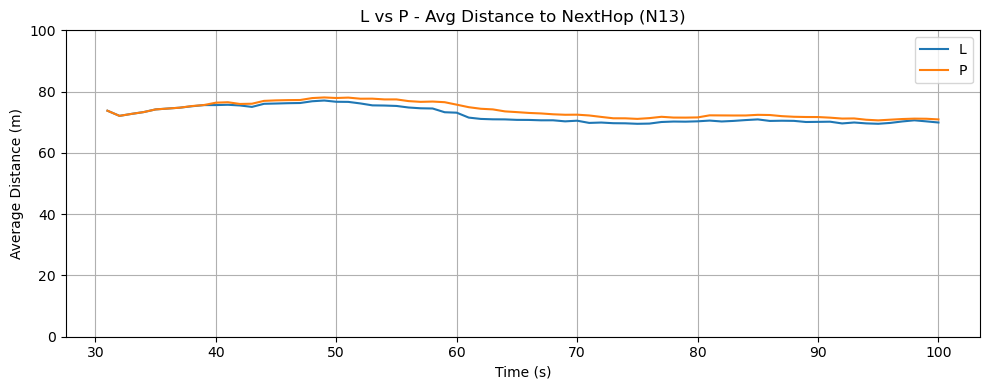

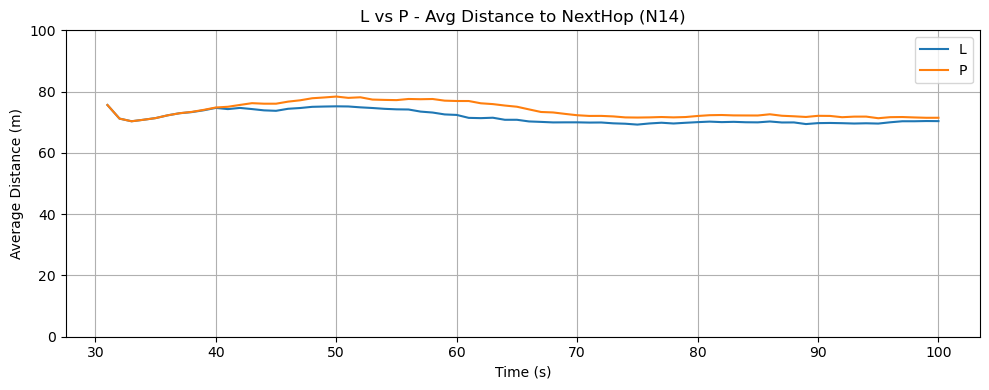

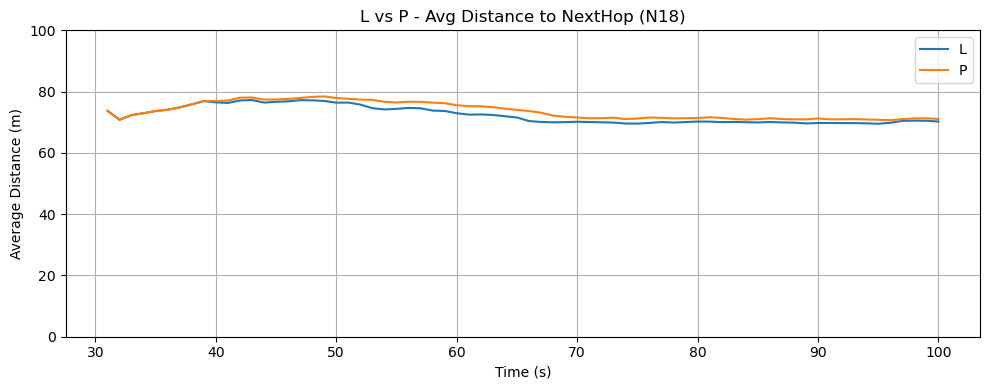

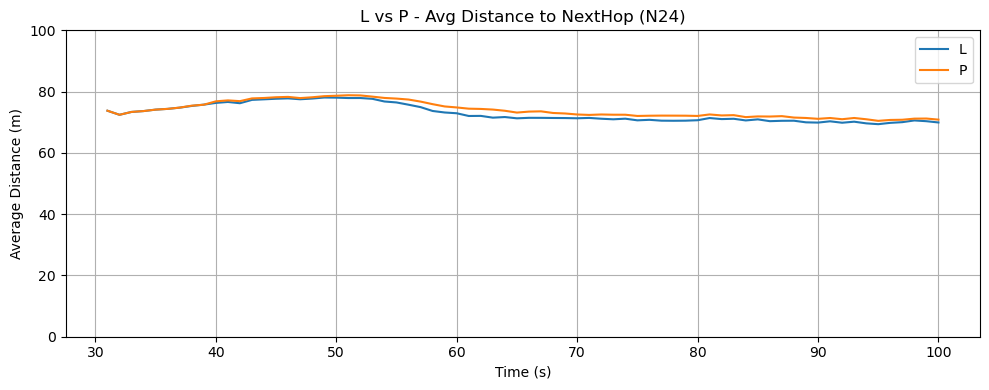

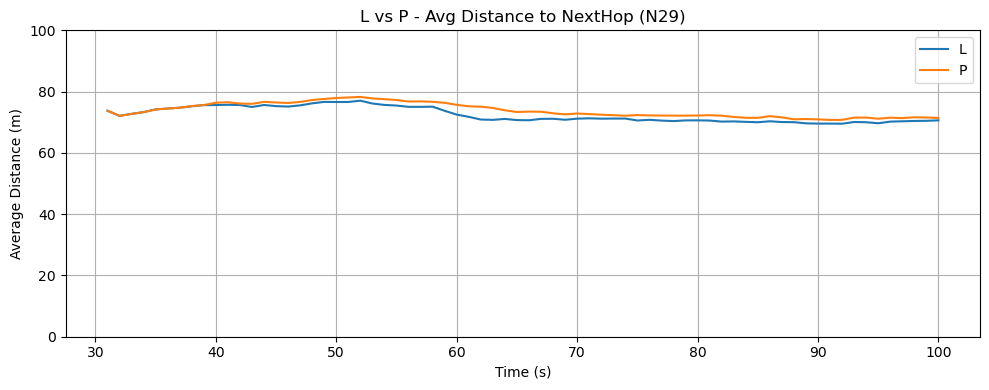

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Log/2025_07_14_AppSci_AODV_V10"
density = "D200"
speed = "S10"
nodes = ["N2", "N3", "N5", "N10", "N13", "N14", "N18", "N24", "N29"]
methods = ["L", "P"]

for node in nodes:
    results = {}

    for method in methods:
        pos_path = os.path.join(base_path, method, density, speed, node, "position.csv")
        if not os.path.exists(pos_path):
            print(f"[{method}] 위치 파일 없음: {pos_path}")
            continue

        df_all = pd.read_csv(pos_path)
        times = sorted(df_all["Time"].unique())
        avg_distances, times_for_plot = [], []

        for t in times:
            df_t = df_all[df_all["Time"] == t]
            if df_t.empty:
                avg_distances.append(0)
                times_for_plot.append(t)
                continue

            dists = [
                sqrt((row["NodeX"] - row["NextHopX"])**2 + (row["NodeY"] - row["NextHopY"])**2)
                for _, row in df_t.iterrows()
            ]
            avg = sum(dists) / len(dists) if dists else 0
            avg_distances.append(avg)
            times_for_plot.append(t)

        results[method] = {
            "times": times_for_plot,
            "avg_distances": avg_distances
        }

    all_avg_dists = [v for m in results.values() for v in m["avg_distances"]]
    if not all_avg_dists:
        print(f"[{node}] 유효한 데이터 없음")
        continue

    plt.figure(figsize=(10, 4))
    for method in methods:
        if method in results:
            plt.plot(results[method]["times"], results[method]["avg_distances"], label=method)
    plt.xlabel("Time (s)")
    plt.ylabel("Average Distance (m)")
    plt.title(f"L vs P - Avg Distance to NextHop ({node})")
    plt.ylim(0, 100)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


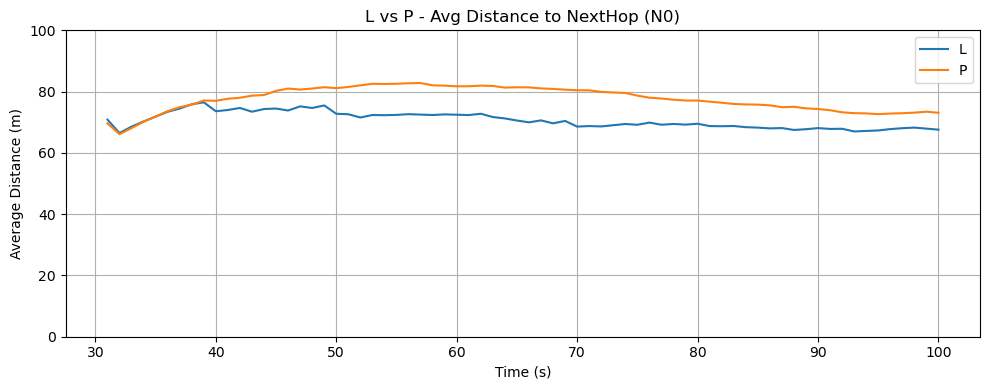

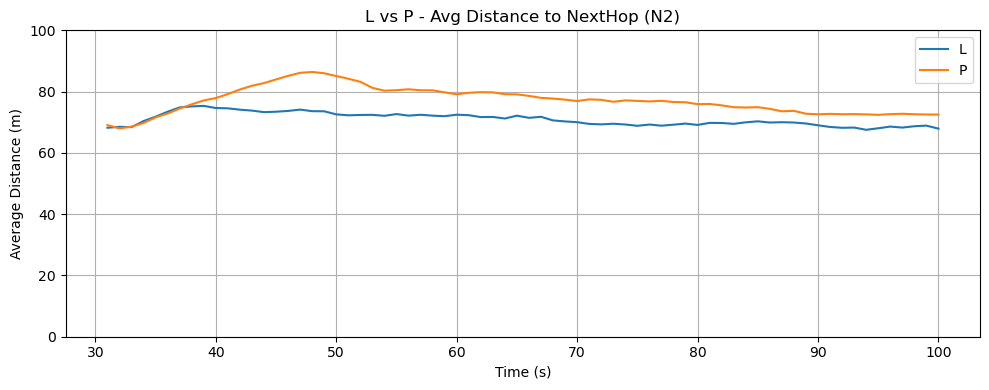

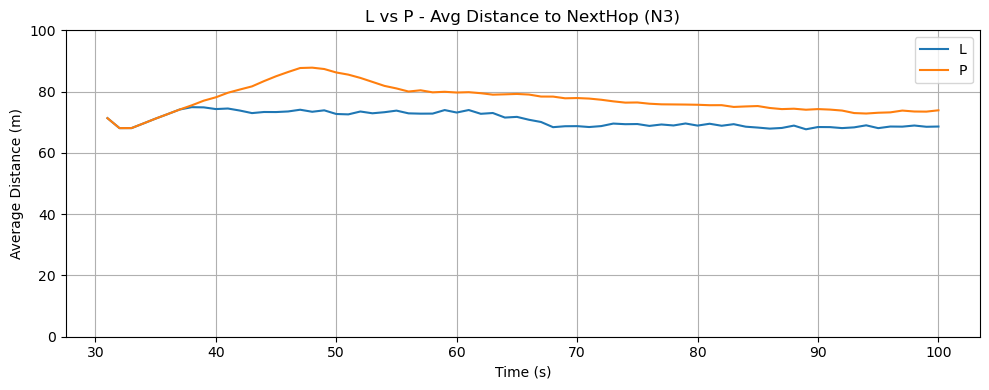

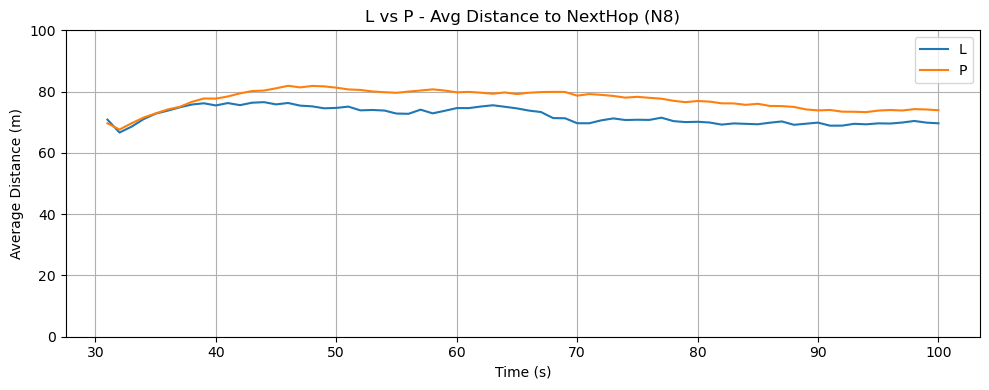

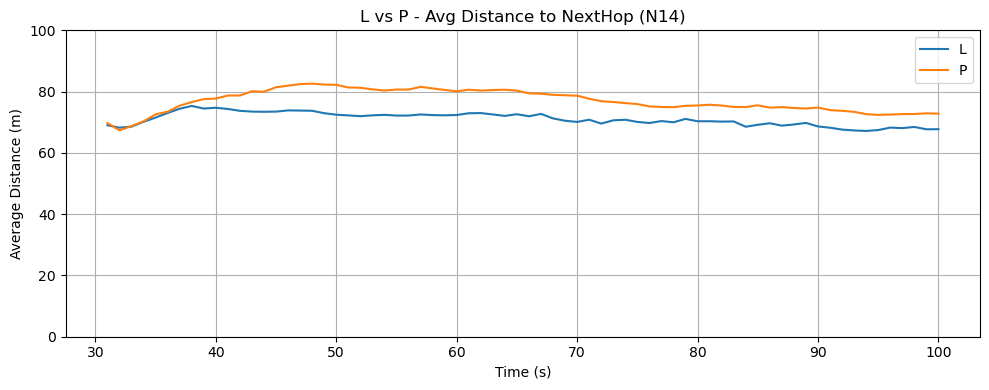

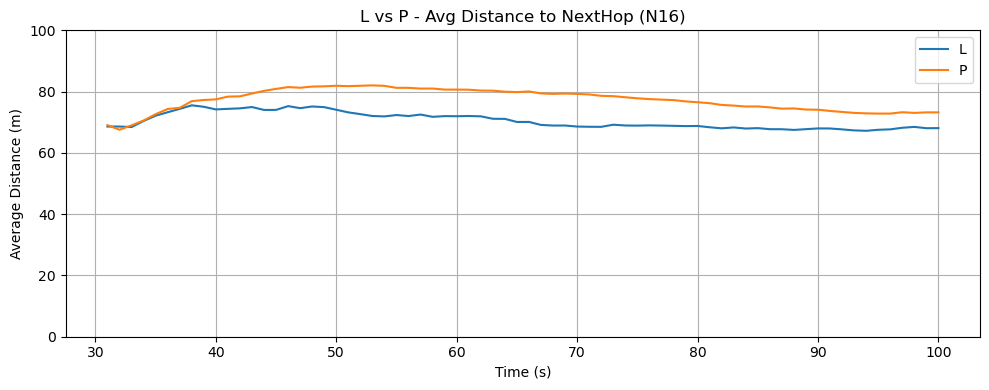

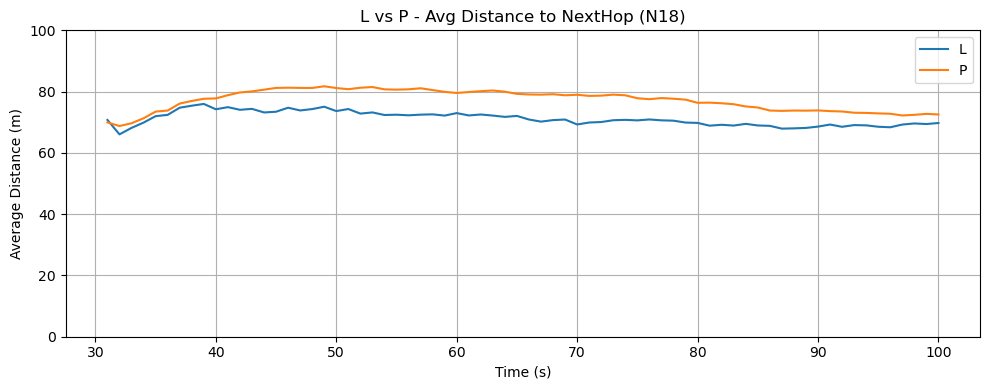

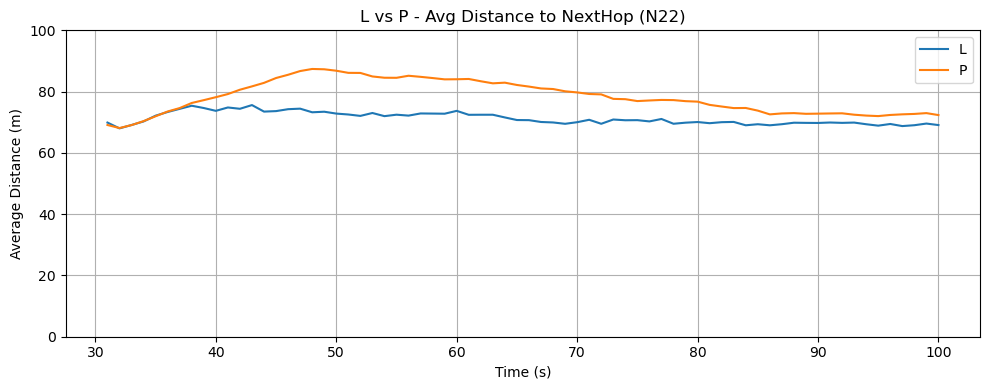

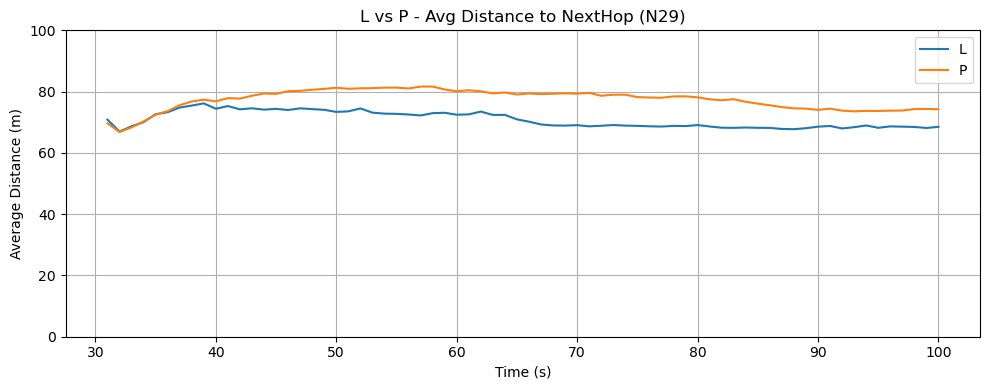

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Log/2025_07_14_AppSci_AODV_V10"
density = "D300"
speed = "S30"
nodes = ["N0", "N2", "N3", "N8", "N14", "N16", "N18", "N22", "N29"]
methods = ["L", "P"]

for node in nodes:
    results = {}

    for method in methods:
        pos_path = os.path.join(base_path, method, density, speed, node, "position.csv")
        if not os.path.exists(pos_path):
            print(f"[{method}] 위치 파일 없음: {pos_path}")
            continue

        df_all = pd.read_csv(pos_path)
        times = sorted(df_all["Time"].unique())
        avg_distances, times_for_plot = [], []

        for t in times:
            df_t = df_all[df_all["Time"] == t]
            if df_t.empty:
                avg_distances.append(0)
                times_for_plot.append(t)
                continue

            dists = [
                sqrt((row["NodeX"] - row["NextHopX"])**2 + (row["NodeY"] - row["NextHopY"])**2)
                for _, row in df_t.iterrows()
            ]
            avg = sum(dists) / len(dists) if dists else 0
            avg_distances.append(avg)
            times_for_plot.append(t)

        results[method] = {
            "times": times_for_plot,
            "avg_distances": avg_distances
        }

    all_avg_dists = [v for m in results.values() for v in m["avg_distances"]]
    if not all_avg_dists:
        print(f"[{node}] 유효한 데이터 없음")
        continue

    plt.figure(figsize=(10, 4))
    for method in methods:
        if method in results:
            plt.plot(results[method]["times"], results[method]["avg_distances"], label=method)
    plt.xlabel("Time (s)")
    plt.ylabel("Average Distance (m)")
    plt.title(f"L vs P - Avg Distance to NextHop ({node})")
    plt.ylim(0, 100)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Log/2025_07_14_AppSci_AODV_V10"
density = "D300"
speed = "S10"
nodes = ["N8", "N2", "N3", "N14", "N18", "N19", "N22", "N25", "N29"]
methods = ["L", "P"]

for node in nodes:
    results = {}

    for method in methods:
        pos_path = os.path.join(base_path, method, density, speed, node, "position.csv")
        if not os.path.exists(pos_path):
            print(f"[{method}] 위치 파일 없음: {pos_path}")
            continue

        df_all = pd.read_csv(pos_path)
        times = sorted(df_all["Time"].unique())
        avg_distances, times_for_plot = [], []

        for t in times:
            df_t = df_all[df_all["Time"] == t]
            if df_t.empty:
                avg_distances.append(0)
                times_for_plot.append(t)
                continue

            dists = [
                sqrt((row["NodeX"] - row["NextHopX"])**2 + (row["NodeY"] - row["NextHopY"])**2)
                for _, row in df_t.iterrows()
            ]
            avg = sum(dists) / len(dists) if dists else 0
            avg_distances.append(avg)
            times_for_plot.append(t)

        results[method] = {
            "times": times_for_plot,
            "avg_distances": avg_distances
        }

    all_avg_dists = [v for m in results.values() for v in m["avg_distances"]]
    if not all_avg_dists:
        print(f"[{node}] 유효한 데이터 없음")
        continue

    plt.figure(figsize=(10, 4))
    for method in methods:
        if method in results:
            plt.plot(results[method]["times"], results[method]["avg_distances"], label=method)
    plt.xlabel("Time (s)")
    plt.ylabel("Average Distance (m)")
    plt.title(f"L vs P - Avg Distance to NextHop ({node})")
    plt.ylim(0, 100)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_33996\1018133453.py:21: DtypeWarning: Columns (0,2,3,4,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(pos_path)


TypeError: '<' not supported between instances of 'int' and 'str'

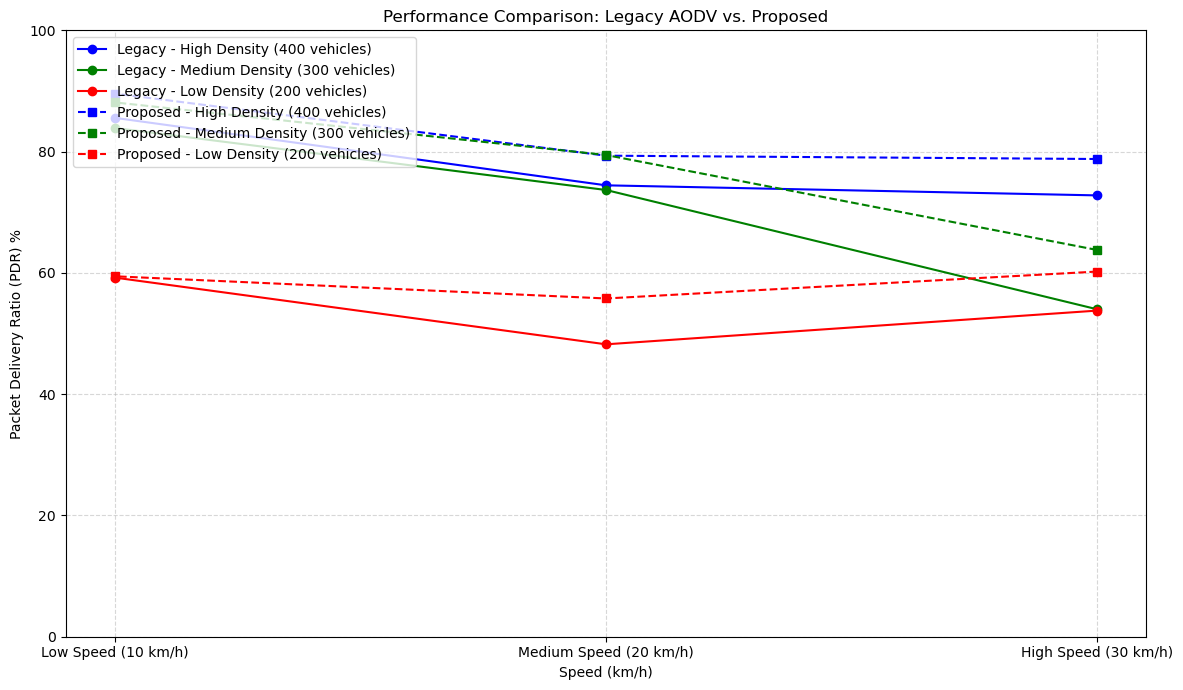

In [ ]:
import matplotlib.pyplot as plt

speeds = ['30 km/h', '20 km/h', '10 km/h']
x = [30, 20, 10]

data = {
    'Legacy - High Density (400 vehicles)': [72.78, 74.44, 85.56],
    'Legacy - Medium Density (300 vehicles)': [54.00, 73.67, 83.89],
    'Legacy - Low Density (200 vehicles)': [53.78, 48.22, 59.22],
    'Proposed - High Density (400 vehicles)': [78.78, 79.33, 89.56],
    'Proposed - Medium Density (300 vehicles)': [63.78, 79.44, 88.11],
    'Proposed - Low Density (200 vehicles)': [60.22, 55.78, 59.44],
}

colors = {
    'High Density (400 vehicles)': 'blue',
    'Medium Density (300 vehicles)': 'green',
    'Low Density (200 vehicles)': 'red'
}

markers = {'Legacy': 'o', 'Proposed': 's'}
linestyles = {'Legacy': '-', 'Proposed': '--'}

plt.figure(figsize=(12, 7))

for label, values in data.items():
    method, density = label.split(' - ')
    plt.plot(
        x, values,
        marker=markers[method],
        linestyle=linestyles[method],
        color=colors[density],
        label=label
    )

plt.xticks(x, ['High Speed (30 km/h)', 'Medium Speed (20 km/h)', 'Low Speed (10 km/h)'])
plt.xlabel('Speed (km/h)')
plt.ylabel('Packet Delivery Ratio (PDR) %')
plt.title('Performance Comparison: Legacy AODV vs. Proposed')
plt.grid(True, linestyle='--', alpha=0.5)

plt.legend(loc='upper left')

plt.ylim(40, 100)
plt.tight_layout()
plt.show()


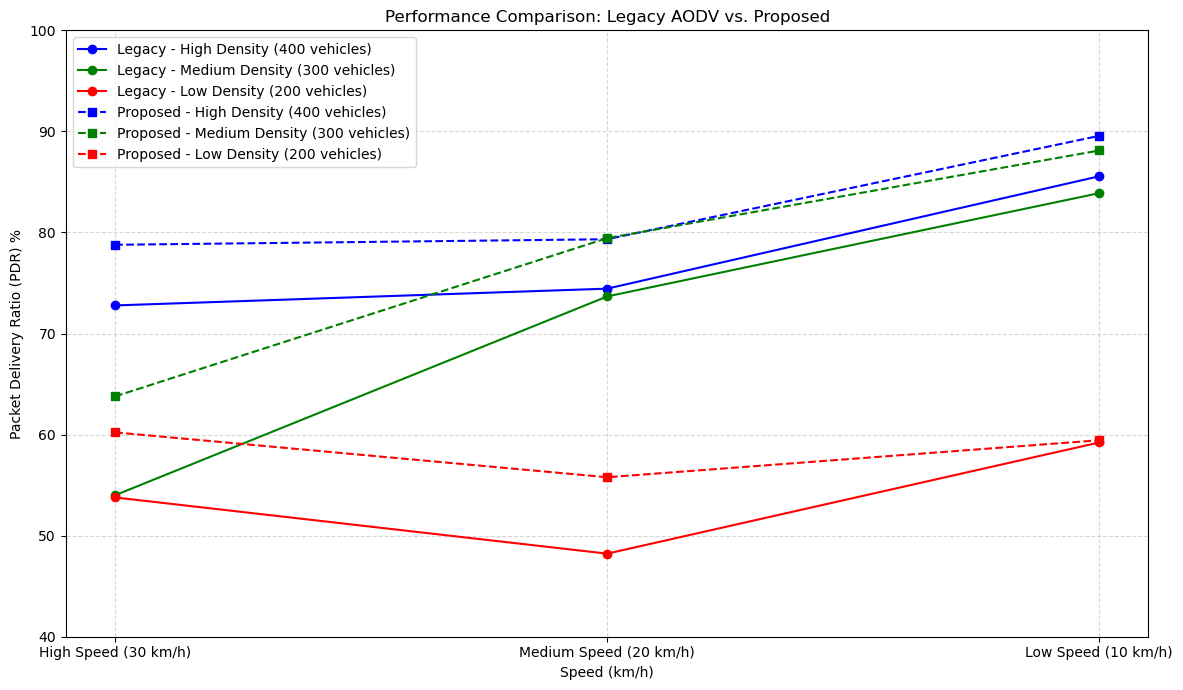

In [ ]:
import matplotlib.pyplot as plt

speeds = ['30 km/h', '20 km/h', '10 km/h']
x = [30, 20, 10]

data = {
    'Legacy - High Density (400 vehicles)': [72.78, 74.44, 85.56],
    'Legacy - Medium Density (300 vehicles)': [54.00, 73.67, 83.89],
    'Legacy - Low Density (200 vehicles)': [53.78, 48.22, 59.22],
    'Proposed - High Density (400 vehicles)': [78.78, 79.33, 89.56],
    'Proposed - Medium Density (300 vehicles)': [63.78, 79.44, 88.11],
    'Proposed - Low Density (200 vehicles)': [60.22, 55.78, 59.44],
}

colors = {
    'High Density (400 vehicles)': 'blue',
    'Medium Density (300 vehicles)': 'green',
    'Low Density (200 vehicles)': 'red'
}

markers = {'Legacy': 'o', 'Proposed': 's'}
linestyles = {'Legacy': '-', 'Proposed': '--'}

plt.figure(figsize=(12, 7))

for label, values in data.items():
    method, density = label.split(' - ')
    plt.plot(
        x, values,
        marker=markers[method],
        linestyle=linestyles[method],
        color=colors[density],
        label=label
    )

plt.xticks(x, ['High Speed (30 km/h)', 'Medium Speed (20 km/h)', 'Low Speed (10 km/h)'])
plt.xlabel('Speed (km/h)')
plt.ylabel('Packet Delivery Ratio (PDR) %')
plt.title('Performance Comparison: Legacy AODV vs. Proposed')
plt.grid(True, linestyle='--', alpha=0.5)

plt.legend(loc='upper left')

plt.ylim(40, 100)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()


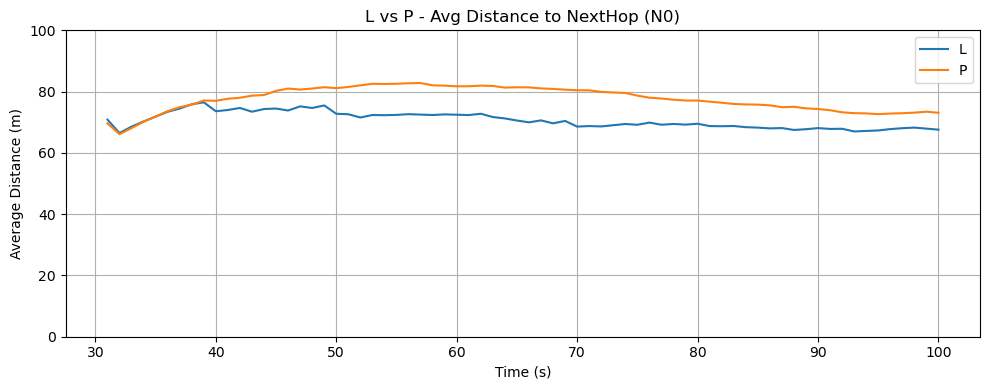

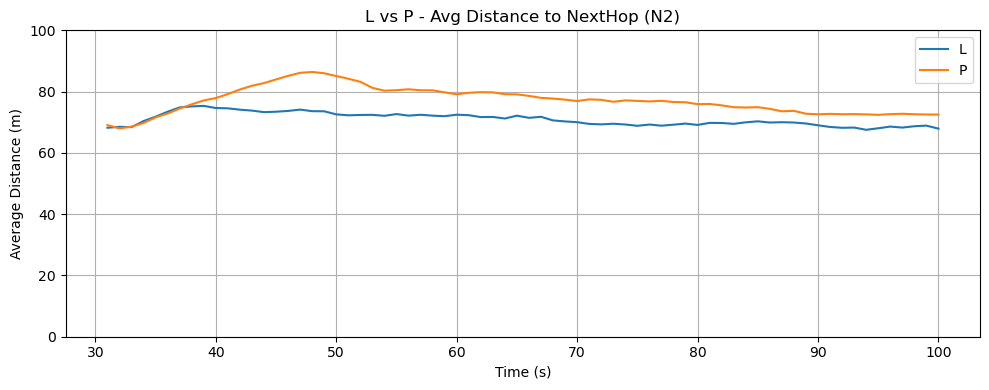

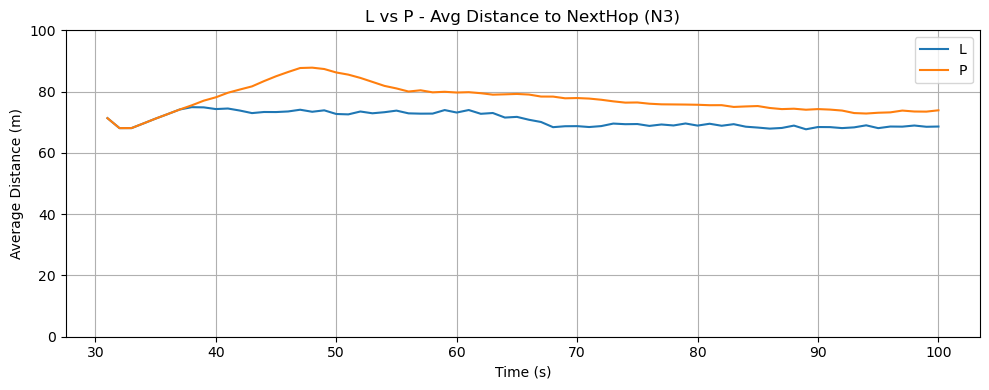

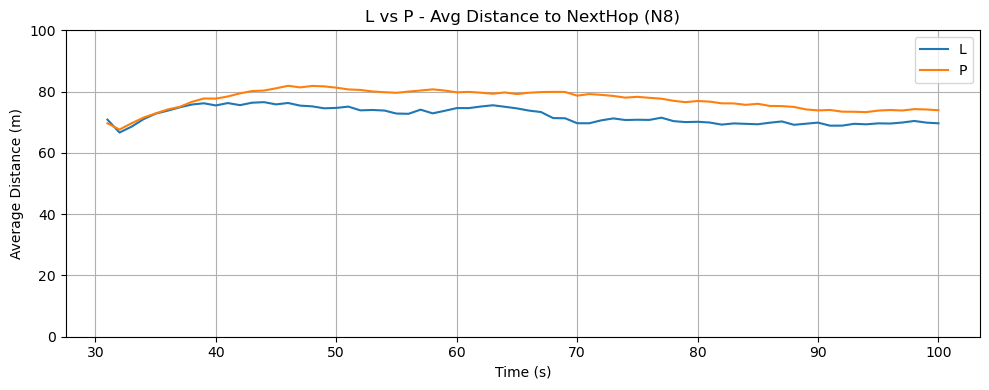

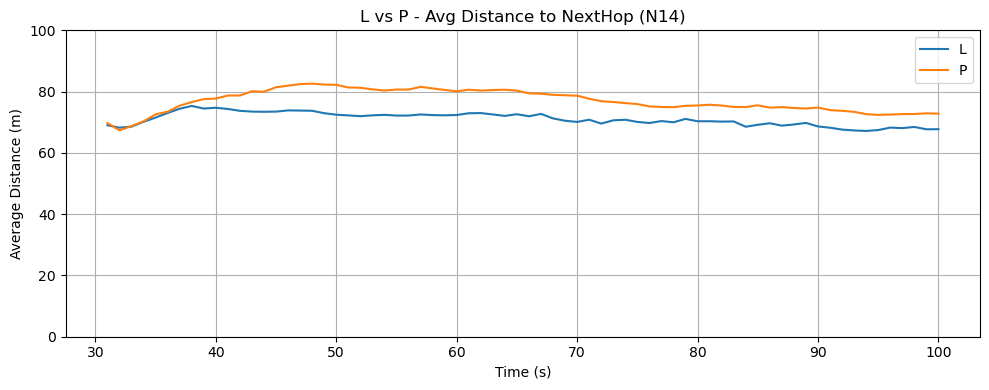

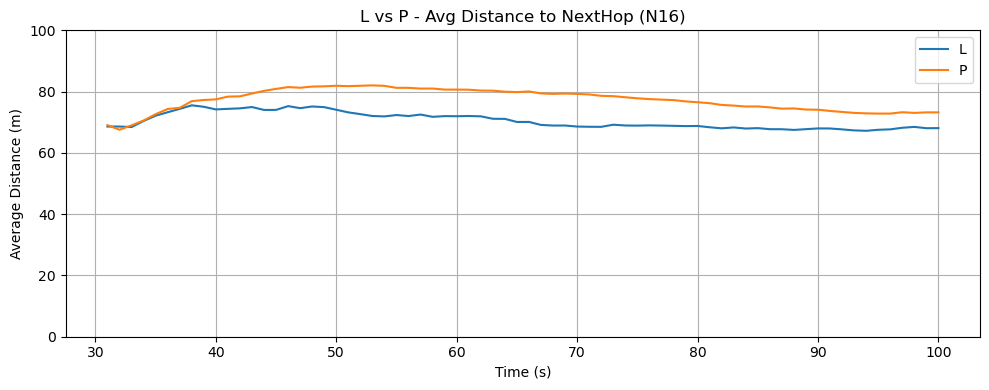

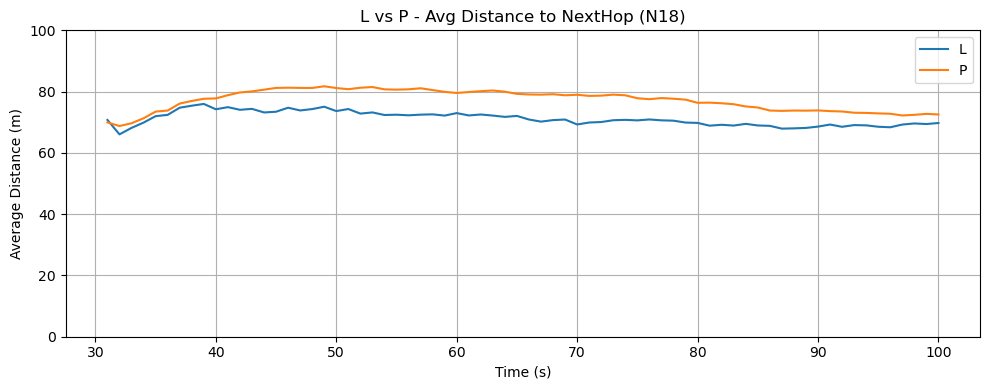

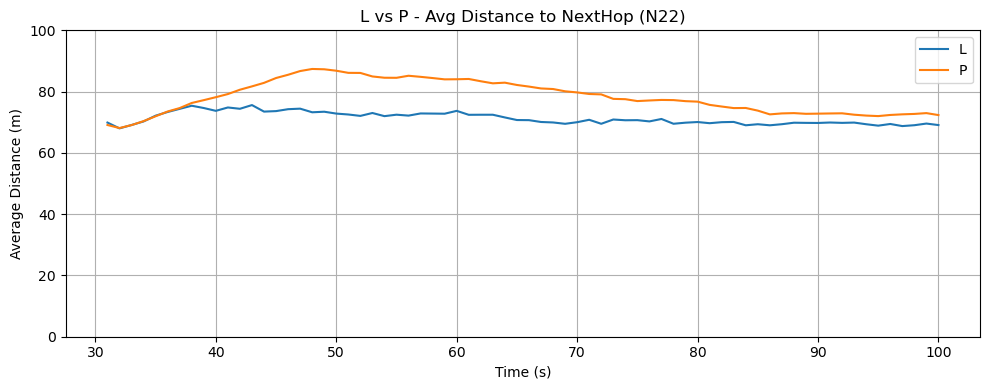

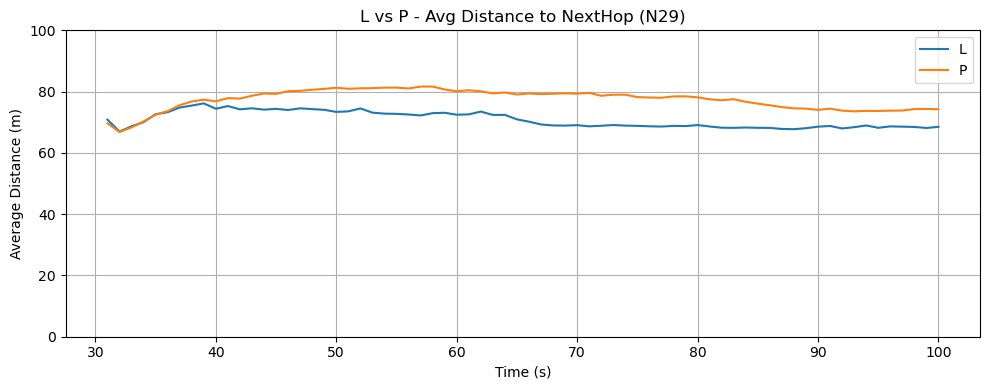

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Log/2025_07_14_AppSci_AODV_V10"
density = "D300"
speed = "S30"
nodes = ["N0", "N2", "N3", "N8", "N14", "N16", "N18", "N22", "N29"]
methods = ["L", "P"]

for node in nodes:
    results = {}

    for method in methods:
        pos_path = os.path.join(base_path, method, density, speed, node, "position.csv")
        if not os.path.exists(pos_path):
            print(f"[{method}] 위치 파일 없음: {pos_path}")
            continue

        df_all = pd.read_csv(pos_path)
        times = sorted(df_all["Time"].unique())
        avg_distances, times_for_plot = [], []

        for t in times:
            df_t = df_all[df_all["Time"] == t]
            if df_t.empty:
                avg_distances.append(0)
                times_for_plot.append(t)
                continue

            dists = [
                sqrt((row["NodeX"] - row["NextHopX"])**2 + (row["NodeY"] - row["NextHopY"])**2)
                for _, row in df_t.iterrows()
            ]
            avg = sum(dists) / len(dists) if dists else 0
            avg_distances.append(avg)
            times_for_plot.append(t)

        results[method] = {
            "times": times_for_plot,
            "avg_distances": avg_distances
        }

    all_avg_dists = [v for m in results.values() for v in m["avg_distances"]]
    if not all_avg_dists:
        print(f"[{node}] 유효한 데이터 없음")
        continue

    plt.figure(figsize=(10, 4))
    for method in methods:
        if method in results:
            plt.plot(results[method]["times"], results[method]["avg_distances"], label=method)
    plt.xlabel("Time (s)")
    plt.ylabel("Average Distance (m)")
    plt.title(f"L vs P - Avg Distance to NextHop ({node})")
    plt.ylim(0, 100)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


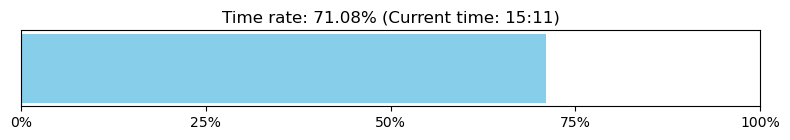

In [8]:
import datetime
import matplotlib.pyplot as plt
import time

def plot_progress_bar(current_time):
    start_time = datetime.datetime.combine(current_time.date(), datetime.time(9, 30))
    end_time = datetime.datetime.combine(current_time.date(), datetime.time(17, 30))
    total_minutes = (end_time - start_time).total_seconds() / 60

    elapsed_minutes = (current_time - start_time).total_seconds() / 60
    progress = max(0, min(elapsed_minutes / total_minutes, 1))

    plt.figure(figsize=(8, 1.5))
    plt.barh([0], [progress], color='skyblue', height=0.5)
    plt.xlim(0, 1)
    plt.yticks([])
    plt.xticks([0, 0.25, 0.5, 0.75, 1], ['0%', '25%', '50%', '75%', '100%'])
    plt.title(f'Time rate: {progress * 100:.2f}% (Current time: {current_time.strftime("%H:%M")})')
    plt.tight_layout()
    plt.show()

now = datetime.datetime.now() #+ datetime.timedelta(hours=1, minutes=0)
plot_progress_bar(now)


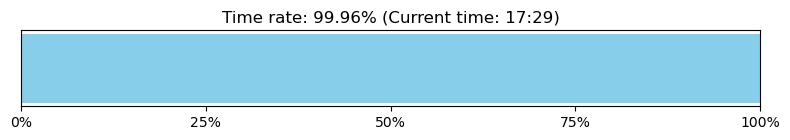

In [15]:
import datetime
import matplotlib.pyplot as plt
import time

def plot_progress_bar(current_time):
    start_time = datetime.datetime.combine(current_time.date(), datetime.time(9, 30))
    end_time = datetime.datetime.combine(current_time.date(), datetime.time(17, 30))
    total_minutes = (end_time - start_time).total_seconds() / 60

    elapsed_minutes = (current_time - start_time).total_seconds() / 60
    progress = max(0, min(elapsed_minutes / total_minutes, 1))

    plt.figure(figsize=(8, 1.5))
    plt.barh([0], [progress], color='skyblue', height=0.5)
    plt.xlim(0, 1)
    plt.yticks([])
    plt.xticks([0, 0.25, 0.5, 0.75, 1], ['0%', '25%', '50%', '75%', '100%'])
    plt.title(f'Time rate: {progress * 100:.2f}% (Current time: {current_time.strftime("%H:%M")})')
    plt.tight_layout()
    plt.show()

now = datetime.datetime.now() #+ datetime.timedelta(hours=1, minutes=0)
plot_progress_bar(now)
